<font size=6  color=#003366> [LINMA 2472] - ALGORITHMS IN DATA SCIENCE <br><br> 
HW 2 (Part I): k-PCA for outlier detection!   </font> <br><br><br>

<font size=5  color=#003366>


<br><br>
Loïc Van Hoorebeeck [LVH]  (loic.vanhoorebeeck@uclouvain.be)<br> <br>
<div style="text-align: right"> Version 1 (2021-10-27)</div>
GROUPE 10
<br><br>
</font>

<br>

<font size=7 color=#009999> Assignment 1. PCA vs. k-PCA <br><br> for outlier detection </font> <br>

<br>
<font size=5 color=#009999> Contex </font> <br>

In this assignment, you are asked to compare PCA vs. KPCA (or k-PCA) for outlier detection. We define an outlier as any point sampled from another distribution than the one we are interested in.



<font size=5 color=#009999> Instruction </font> <br>

You should fill the jupyter notebook, and write a written report that answers the questions from the pdf file.

You have to submit <b> 3 </b> files on moodle:

    - Your jupyter notebook as .ipynb 
    - Your jupyter notebook (with all output, that is after running everything) as .pdf
    - Your written report as .pdf
    
Note that we filled the notebook such that it runs without throwing errors... But we had to sometimes write dummy lines, which implies that the plots look also dummy.

When you have to modify something in the code, you'll find a "TODO" mark.

</font>

In [1]:
#Various import

import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd


# When developping code, it is often easier to work with a fixed seed
np.random.seed(42)

<font size=5 color=#009999> Q1. IMPORT THE DATA and perform EDA</font> <br>

The data consists in two arrays $X \in \mathbb{R}^{N \times 2}$ and $\mathbf{y} \in \mathbb{R}^{N}$ with

$$
y_i =
\begin{cases}
    1 & \text{ if } & \mathbf{X}_{i, *} & \text{ is an outlier,}\\
    0 & \text{ if } & \mathbf{X}_{i, *} & \text{ is a true point.}
\end{cases}
$$

with $N$ the number of samples. There are $N_o$ outliers and $N_t$ *true* point, that is $N_t$ points that are not outliers.




--------------------------------

The outlier ratio is 0.2

--------------------------------



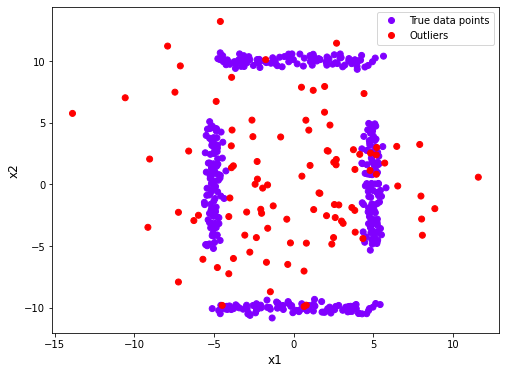


--------------------------------

EDA for x1 
 Min= -4.4707842962097 
 Max= 10.120047162510167 
 Mean= 2.824631433150233 
 Var= 53.223090664192334 
 mediane= 2.824631433150233


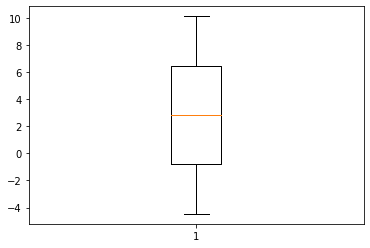


--------------------------------

EDA for x2 
 Min= -4.605368503758177 
 Max= 10.672267959760438 
 Mean= 3.0334497280011306 
 Var= 58.35154397785839 
 mediane= 3.0334497280011306


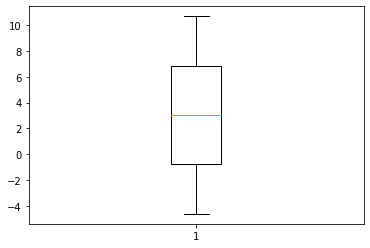

In [ ]:
# Import of the data
X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt').astype(int)

# TODO
# Computing outlier ratio
ro = np.sum(y)/len(y)
print("\n--------------------------------\n")
print(f'The outlier ratio is {ro}')
print("\n--------------------------------\n")

# Plot x1 vs x2 and color it by y 
plt.figure(figsize=(8,6))
classes = ['True data points', 'Outliers']
values = y
scatter = plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[
           0], labels=classes, loc="upper right")
plt.xlabel('x1', fontsize=12)
plt.ylabel('x2', fontsize=12)
plt.show()

# Analyse descriptive
print("\n--------------------------------\n")
# -> Pour X[0] ou x1
m = np.mean(X[0])
v = np.var(X[0])
maxi = np.max(X[0])
mini = np.min(X[0])
med = np.median(X[0])
print("EDA for x1","\n Min=",mini,"\n Max=",maxi,"\n Mean=",m,"\n Var=",v,"\n mediane=",med)
plt.boxplot(X[0])
plt.show()
print("\n--------------------------------\n")
# -> Pour X[1] ou x2
m = np.mean(X[1])
v = np.var(X[1])
maxi = np.max(X[1])
mini = np.min(X[1])
med = np.median(X[1])
print("EDA for x2","\n Min=",mini,"\n Max=",maxi,"\n Mean=",m,"\n Var=",v,"\n mediane=",med)
plt.boxplot(X[1])
plt.show()


<font size=5 color=#009999> Q2. Perform the splits </font> <br>

</font>

No need to reimplent the wheel: use <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html'><code>train_test_split</code></a> from sklearn to perform the splits.

In [ ]:
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = True) # Par défaut train_test_split utilise shuffle=True

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,random_state=1, test_size=0.3)

# https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

print("X.shape=",X.shape,"|| y.shape=",y.shape)
print("X_train.shape=",X_train.shape,"|| X_test.shape=",X_test.shape,"|| X_val.shape=",X_val.shape)
print("y_train.shape=",y_train.shape,"|| y_test.shape=",y_test.shape,"|| y_val.shape=",y_val.shape)

# Mélanger car tous les outliers sont à la fin 

X.shape= (500, 2) || y.shape= (500,)
X_train.shape= (315, 2) || X_test.shape= (50, 2) || X_val.shape= (135, 2)
y_train.shape= (315,) || y_test.shape= (50,) || y_val.shape= (135,)


We need to specify shuffle=True to avoid having outliers only in one of the sets (train, validation and test). Shuffling ensures that outliers are presents in all three sets.

<font size=5 color=#009999> Q3. PCA </font> <br>
</font>

Let us implement an outlier detector using PCA. In order to make our life easier, we will create a class, denoted as <code>OutlierDetectorPCA</code>, that inherits from other classes of <code>sklearn</code>.

We implemented most of the class, but there are some parts missing...

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

plt.rcParams['figure.figsize'] = [20, 10]

class OutlierDetectorPCA(BaseEstimator, ClassifierMixin):
    def __init__(self, k):
        """ ------------------------------------------------------------------------------
        Class constructor
        INPUT:
            - k: the number of eigenvectors that we keep, or equivalently, the size of the
                 the eigen (sub)space.
        ------------------------------------------------------------------------------ """

        self.k = k
        self.is_fitted_ = False
        self.pca = PCA()
        self.name = 'PCA'
        self.pca = PCA()  # Question: ceci est-ce une erreur? c'est la  même chose que la 3ème ligne plus haut
        self.tau = np.inf

  
    def _get_recons_error(self, X, X_hat):
        """ ------------------------------------------------------------------------------
        Compute the reconstruction error between X and X_hat, where X_hat is the projection 
        of X onto the k-dimensional eigenspace
        INPUT: 
            - X: initial features
            - X_hat: projected features
        OUTPUT:
            - recons_error: the reconstruction error
        ------------------------------------------------------------------------------ """

        #recons_error = np.ones(X.shape[0])
        
        # TO DO (ps it's a one-liner)
        #recons_error = np.sqrt(np.sum(((X - X_hat) ** 2), axis=1))  # Distance euclidienne 
        recons_error = np.linalg.norm(X, axis=1)**2 - np.linalg.norm(X_hat, axis=1)**2 # Essai avec la formule du prof slide 52

        return recons_error

    def _predict_tau_ROC(self, X, tau):
        """ ------------------------------------------------------------------------------
        Companion function used to properly deal with the inheritance
        ------------------------------------------------------------------------------ """
        return self.predict_tau(X, tau)    
    
    
    def fit(self, X, y=None):
        """ ------------------------------------------------------------------------------
        Fit the model to the true data
        INPUT: 
            - X: train data
            - y: label data
        OUTPUT:
            - the classifier
        ------------------------------------------------------------------------------ """
        
        # We find the index of true data, i.e., not the outliers
        
        idx = np.where(y==0)[0]
        

        X_true = X[idx, :]
        
        # In this (supervised) context, it is better to fit PCA on the true data
        self.pca.fit(X_true)
        
        # X_pca stands for X expressed in the PCA basis
        X_pca = self.pca.transform(X_true)
        
        # X_hat_pca is the projection of X_pca on the eigenspace of dimension k
        # this is done by selecting the k first principal components
        X_hat_pca = X_pca[:, :self.k]
 
        
        recons_error = self._get_recons_error(X_pca, X_hat_pca)
        
        self.is_fitted_ = True

        """
            TODO: compute tau such that
                - No true data will be labeled as outlier in the training set
                - The true positive rate (TPR) is maximized
        """
               
        self.tau = 42 # Valeur initiale
        self.tau = np.max(recons_error) 
        self.tau_max = self.tau # Do not change this line :-)

        return self


    
    def predict(self, X):
        """ ------------------------------------------------------------------------------
        Predict the data using the fitted model
        INPUT: 
            - X: data
        OUTPUT:
            - y: predictions
        ------------------------------------------------------------------------------ """
        
        # Sanity checks
        check_is_fitted(self)
        X = check_array(X)
        
        y = self.predict_tau(X, self.tau)
        return y

    def get_label(self):
        label = "{name}: k={k}".format(name=self.name, k=self.k)
        return label


    def get_ROC(self, X_train, y_train):
        """ ------------------------------------------------------------------------------
        Compute the quantities needed to plot the ROC
        INPUT: 
            - X_train: data of the train set
            - y_train: label of the train set
        OUTPUT:
            - FPR: False positive rate
            - TPR: True positive rate
        ------------------------------------------------------------------------------ """
        self.score(X_train,y_train) # Should update the tau_max
        n_tau = 100
        taus = np.linspace(0, self.tau, n_tau)
        
        TPR = np.empty(n_tau+1)
        FPR = np.empty(n_tau+1)
        N = np.count_nonzero(y_train)
        P = len(y_train) - N

        for i, _t in enumerate(taus):
            x_detec = self._predict_tau_ROC(X_train, _t)
            TPR[i] = np.sum(np.logical_and(x_detec, y_train))/N
            FPR[i] = np.sum(np.logical_and(x_detec, np.logical_not(y_train)))/P

        # One last time for tau_max that may change during the prediction...
        x_detec = self._predict_tau_ROC(X_train, self.tau_max)
        TPR[-1] = np.sum(np.logical_and(x_detec, y_train))/N
        FPR[-1] = np.sum(np.logical_and(x_detec, np.logical_not(y_train)))/P        
            
        return FPR, TPR
             
    
    def predict_tau(self, X, tau):
        """ ------------------------------------------------------------------------------
        Predict the data using the fitted model with a given treshold tau
        INPUT: 
            - X: data, nd.array of shape (n_samples, n_features)
            - tau: treshold
        OUTPUT:
            - y: binary predictions, nd.array of shape (n_samples,)
            
        If the reconstruction error of X[i, :] is:
                - greater than tau: y[i] = 1 (outlier detection)
                - smaller or equal than tau: y[i] = 0         
        ------------------------------------------------------------------------------ """
        
        # TODO
        # https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html        
        #y_pred = np.ones(X.shape[0])
        y_pred = []
        X_pca=self.pca.transform(X) # Apply dimensionality reduction to X
        X_hat = X_pca[:, :self.k] # =projection of X_pca on the eigenspace of dimension k
        recons_error = self._get_recons_error(X_pca, X_hat) 
        for i in recons_error:
          if(i>tau):
            y_pred.append(1)
          else:
            y_pred.append(0)
        y_pred = np.asarray(y_pred)

        self.tau_max = max(self.tau, max(recons_error)) # Do not change this line :-)

        return y_pred   
    
    
    def _score(self, X_val, y_val):
        """ ------------------------------------------------------------------------------
        Compute the score on some test set
        INPUT: 
            - X: input
            - y: label
        OUTPUT:
            - score: the ratio of "hit", (TP+TN)/(P+N)
        ------------------------------------------------------------------------------ """      

        # TODO
       
        y_pred = self.predict(X_val)
        from sklearn.metrics import confusion_matrix # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

        score = (tn+tp)/ (tn+fn+fp+tp) 

        #recons_error =  self._get_recons_error(X_pca, X_hat) # change this line accordingly
        #X_pca = self.pca.transform(X_val)
        #X_hat = X_pca[:,:self.k]
        #self.tau_max = max(self.tau, max(recons_error)) # Do not change this line :-)

        return score

    def transform(self, X):
        return self.pca.transform(X)
   


In [ ]:
# Helping functions for visualisation, nothing TODO here,
# but you may have a look and/or change anything (but use comments!).

def plot_ROC(classifs, X_train, y_train, file_name=None):
    """ ------------------------------------------------------------------------------
    Plot the ROC of classifiers.    
    INPUT:
        - classifs: either a single classifier, or a list of classifiers
        - X_train: train data
        - y_train: train label
        - file_name: name of the file to be saved

        - save: boolean, whether we save or not the fig
    OUTPUT:
        - plot the ROC of the different classifiers in classifs
        - if file_name is not None, save as file_name.pdf
    ------------------------------------------------------------------------------ """    
    if not isinstance(classifs, list):
        classifs = [classifs]
    fig, ax = plt.subplots()
    for classif in classifs:
        FPR, TPR = classif.get_ROC(X_train, y_train)
        label = classif.get_label() 
            
        ax.plot(FPR, TPR, label=label)
    ax.set_xlabel('False Positive Rate', fontsize=14)
    ax.set_ylabel('True Positive Rate', fontsize=14)
    ax.plot([0, 1], [0, 1], '--', label = 'random classifier')
    ax.scatter(0, 1, marker='o', color='green', label='Perfect classifier')
    ax.legend(fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
    if file_name:
        plt.savefig(file_name+'.pdf', bbox_inches='tight')
        

def plot_comparison_outlier_detector(list_clf, X_avail, y_avail, file_name=None):
    """ ------------------------------------------------------------------------------
    Plot the regions where the classifier output an outlier (in green) or not (in purple)
    for two classifiers.
    INPUT: 
        - list_clf: List of classifiers
        - X_avail: data
        - y_avail: label
        - file_name: name of the file to be saved
    OUTPUT:
        - plot of the different classification regions
        - if file_name is not None, save as file_name.pdf
    ------------------------------------------------------------------------------ """

    plt.figure()
    n_clf = len(list_clf)
    
    plt.rcParams['figure.figsize'] = [20, 10*(n_clf//2+1)]

    n_outlier = np.count_nonzero(y_avail)
    
    t = np.linspace(-20, 20, 50)
    X1, X2 = np.meshgrid(t, t)  
    cmap = plt.get_cmap('PiYG')
    
    for n, clf in enumerate(list_clf):
        plt.subplot(n_clf//2+1, 2, n+1)
        plt.title("({name})".format(name=clf.get_label()), wrap=True, fontsize=14)

        blues = np.arange(X_avail.shape[0]-n_outlier)
        reds = np.arange(X_avail.shape[0]-n_outlier, X_avail.shape[0])

        plt.xlabel("$x_1$")
        plt.ylabel("$x_2$")

        X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

        P_grid_PCA = clf.predict(X_grid.reshape((-1,2))).reshape(X1.shape)
        plt.tight_layout() # Or equivalently,  "plt.tight_layout()"
        plt.pcolormesh(X1, X2, P_grid_PCA, cmap=cmap, shading='auto')
        plt.colorbar()
        plt.scatter(X[blues, 0], X[blues, 1],
                s=20, edgecolor='k', c=X[blues, 0])

        plt.scatter(X[reds, 0], X[reds, 1],
                s=20, edgecolor='k', c='red')

    if file_name:
        plt.savefig(file_name+'.pdf', bbox_inches='tight')


The score of pca is : 0.8296296296296296


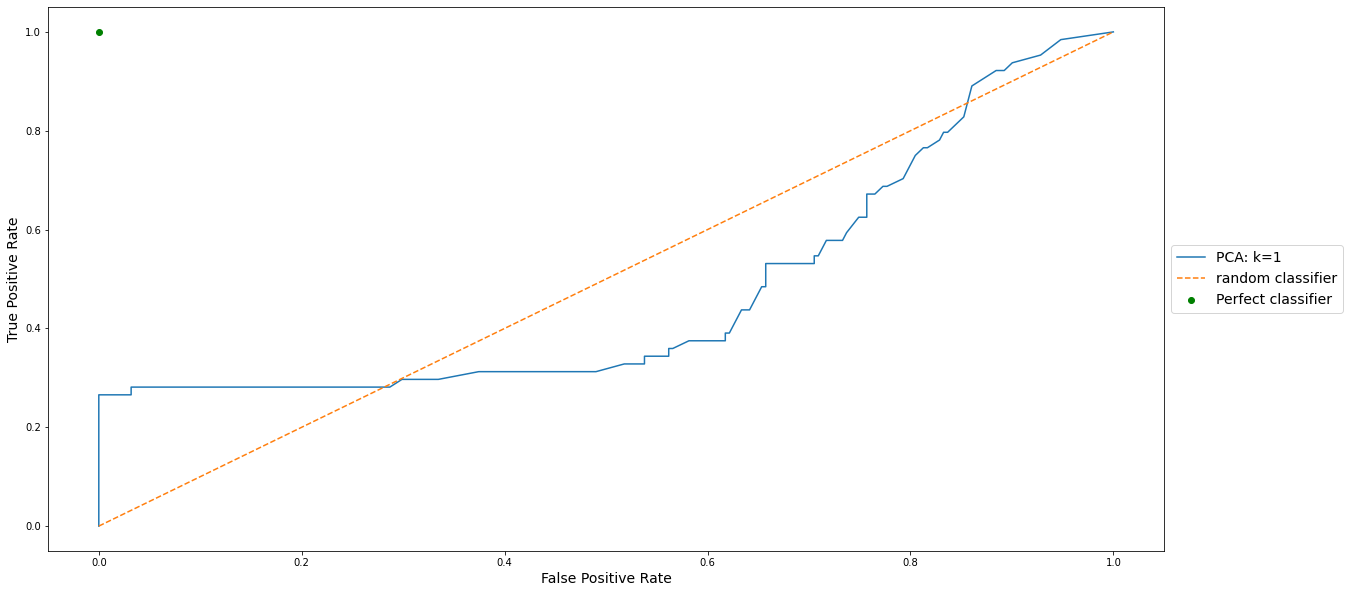

In [ ]:

# TODO: you may test here your implementation of the class OutlierDetectorPCA

# Stupid example
k = 1
clf_pca = OutlierDetectorPCA(k)
clf_pca.fit(X_train, y_train)
score_val = clf_pca.score(X_val,y_val)
print(f"The score of pca is : {score_val}")

plot_ROC(clf_pca, X_train, y_train)


Comments about the validation score:

The validation score is around 0.83. This means that the outlier detector can only correctly classify (1 outlier and 0 non-outlier) 83%. This seems a bit low.

<font size=5 color=#009999> Q4. k-PCA </font> <br>
</font>

Let us implement an outlier detector using <b>k-PCA</b>.
We can now leverage the work we did by defining a class in Q3: we "cheat" by <b>computing the features of the feature space</b> and then applying standard PCA on it.

We implemented most of the class, but there are some parts missing...

<div class="alert alert-warning">
    <b>[Remark]</b> We <b>could</b> implement kPCA without resorting to the explicit computation of the features $\phi(\mathbf{x}_i)$, but the implementation is a bit tricky...

This works here because the data set is not large, both in terms of input space (2-dimensional) and in the number of samples.
    
Remark that even with higher dimensional data set, we could simply restrict ourself to k' (principal) components, and computing the projection onto $\mathcal{S}_k$ with k << k'.
    
It would be interesting for you to take advantage of this to <i>actually see what features in the feature space look like</i>.
    
</div>

In [ ]:

    
    
class OutlierDetectorKPCA(OutlierDetectorPCA):
    def __init__(self, param, k):
        """ ------------------------------------------------------------------------------
        Class constructor
        INPUT:
            - param: a dictionary containing the params of the kernel pca
            - k: the number of eigenvectors that we keep, or equivalently, the size of the
                 the eigen (sub)space.
        Example of the use of the constructor
            
            clf_kpca = OutlierDetectorKPCA(param={'kernel':'rbf', 'gamma':42}, k=1)
        ------------------------------------------------------------------------------ """
        OutlierDetectorPCA.__init__(self, k)  # we take advantage of the inheritance
        self.kpca = KernelPCA(fit_inverse_transform=False, remove_zero_eig=False)
        self.name = 'KPCA'
        self.params = param
        self.kpca.set_params(**param)

    def _predict_tau_ROC(self, X, tau):
        """ ------------------------------------------------------------------------------
        Companion function used to properly deal with the ROC of this inherited class
        ------------------------------------------------------------------------------ """                
        X_kpca = self.kpca.transform(X)
        return OutlierDetectorPCA.predict_tau(self, X_kpca, tau)        
        
    def fit(self, X, y):
        """ ------------------------------------------------------------------------------
        Fit the model to the true data
        INPUT: 
            - X: training data
            - y: label of training data
        OUTPUT:
            - the classifier
        ------------------------------------------------------------------------------ """
        X_kpca = self.kpca.fit_transform(X)
        return OutlierDetectorPCA.fit(self, X_kpca, y)
        
    def get_label(self):
        label = OutlierDetectorPCA.get_label(self) + ", gamma={gamma}, kernel={kernel}".format(
            gamma=self.params['gamma'],
            kernel=self.params['kernel'])
        return label
        
    def predict(self, X):
        """ ------------------------------------------------------------------------------
        Predict the data using the fitted model
        INPUT: 
            - X: data
        OUTPUT:
            - y: predictions
        ------------------------------------------------------------------------------ """        
        # TODO

        #y_pred = np.ones(X.shape[0]) #! il faut une np array pour les graphiques
        X_kpca = self.kpca.transform(X)
        y_pred = OutlierDetectorPCA.predict_tau(self, X_kpca, self.tau) 

        return y_pred
        

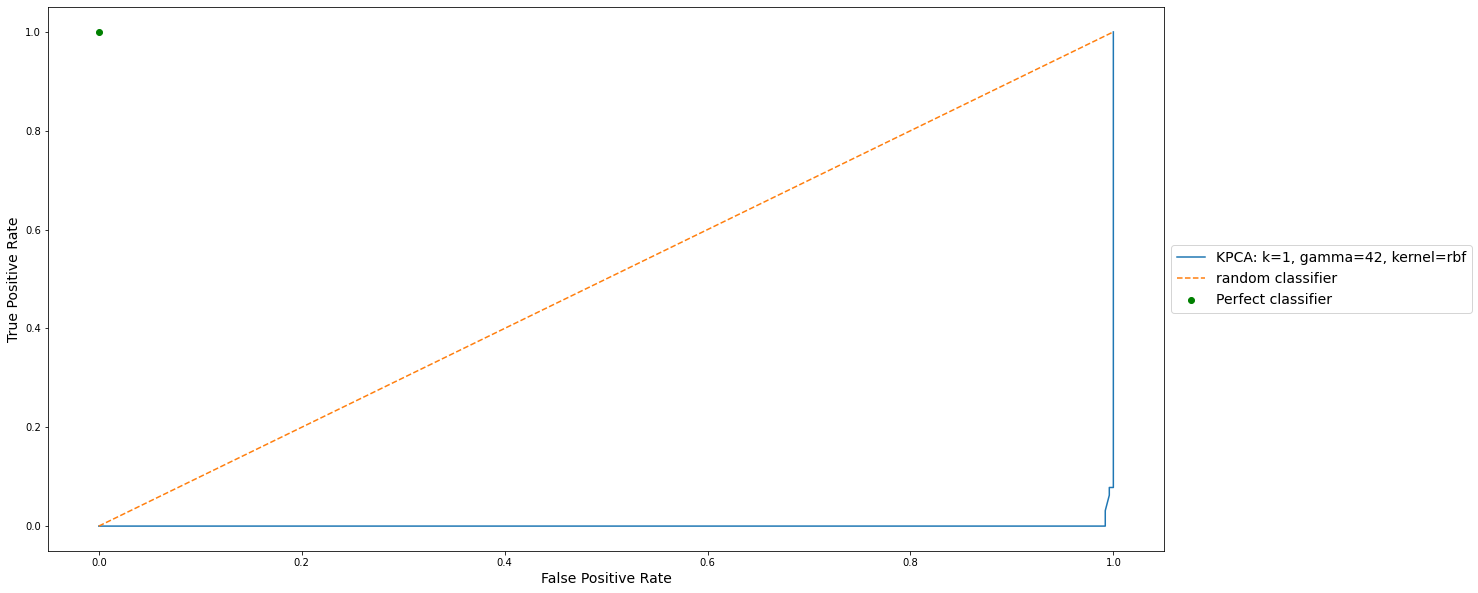

In [ ]:
# TODO: you may test here your implementation of the class OutlierDetectorPCA

# Stupid example
k = 1
param = {"kernel":"rbf", "gamma":42}

clf_kpca = OutlierDetectorKPCA(param, k)
clf_kpca.fit(X_train, y_train)

plot_ROC(clf_kpca, X_train, y_train)




<font size=5 color=#009999> Q5. Model selection </font> <br>
</font>

Perform your model selection: don't forget that you train your models on the train set, and tune the hyperparameter using the validation set.


In [ ]:
# TODO: Model selection

# Step 1: train the PCA detector for k in {1,2}
k_values = [1,2]
pca_val_scores = dict()
for k in k_values:
    clf_pca = OutlierDetectorPCA(k)
    clf_pca.fit(X_train, y_train)
    val_score = clf_pca.score(X_val, y_val)
    pca_val_scores[k] = val_score
    print(f'Training PCA outlier detector for k = {k} - the validation score is {val_score}')

pca_k_opt = max(pca_val_scores, key=pca_val_scores.get)
pca_score_max = max(pca_val_scores.values())
print('\n----------------------------------------------------------------------------')
print(f'The optimal k value for the PCA outlier detector is : {pca_k_opt}, and the corresponding score is: {pca_score_max}')
print('\n----------------------------------------------------------------------------\n\n')

# Step 2: train the kPCA detector for different values of parameters (k, gamma, kernel)
k_values = [1, 5, 10, 100]
g_values = [0.001, 0.01, 1, 10, 100]
kernels = ['rbf', 'poly']
kpca_val_scores = dict()
for k in k_values:
    for gamma in g_values:
        for kernel in kernels:
            param = {"kernel":kernel, "gamma":gamma}
            clf_kpca = OutlierDetectorKPCA(param, k)
            clf_kpca.fit(X_train, y_train)
            val_score = clf_kpca.score(X_val, y_val)
            kpca_val_scores[(k, gamma, kernel)] = val_score
            print(f'Training kPCA outlier detector for k = {k}, gamma = {gamma}, kernel = {kernel} - the validation score is {val_score}')


kpca_param_opt = max(kpca_val_scores, key=kpca_val_scores.get)
kpca_score_max = max(kpca_val_scores.values())

print('\n----------------------------------------------------------------------------')
print(f'The optimal combination of parameters for the kPCA outlier detector is : {kpca_param_opt}, and the corresponding score is: {kpca_score_max}')
print('\n----------------------------------------------------------------------------\n\n')


Training PCA outlier detector for k = 1 - the validation score is 0.8296296296296296
Training PCA outlier detector for k = 2 - the validation score is 0.8296296296296296

----------------------------------------------------------------------------
The optimal k value for the PCA outlier detector is : 1, and the corresponding score is: 0.8296296296296296

----------------------------------------------------------------------------


Training kPCA outlier detector for k = 1, gamma = 0.001, kernel = rbf - the validation score is 0.8296296296296296
Training kPCA outlier detector for k = 1, gamma = 0.001, kernel = poly - the validation score is 0.8444444444444444
Training kPCA outlier detector for k = 1, gamma = 0.01, kernel = rbf - the validation score is 0.837037037037037
Training kPCA outlier detector for k = 1, gamma = 0.01, kernel = poly - the validation score is 0.8296296296296296
Training kPCA outlier detector for k = 1, gamma = 1, kernel = rbf - the validation score is 0.82962962962

<font size=4 color=#009999> Plot the results </font> <br>
</font>

The score with PCA detector(k= 1) on the training data is: 0.8444444444444444
The score with kPCA detector (k = 10, gamma = 0.001, kernel = rbf) on the training data is: 0.9523809523809523


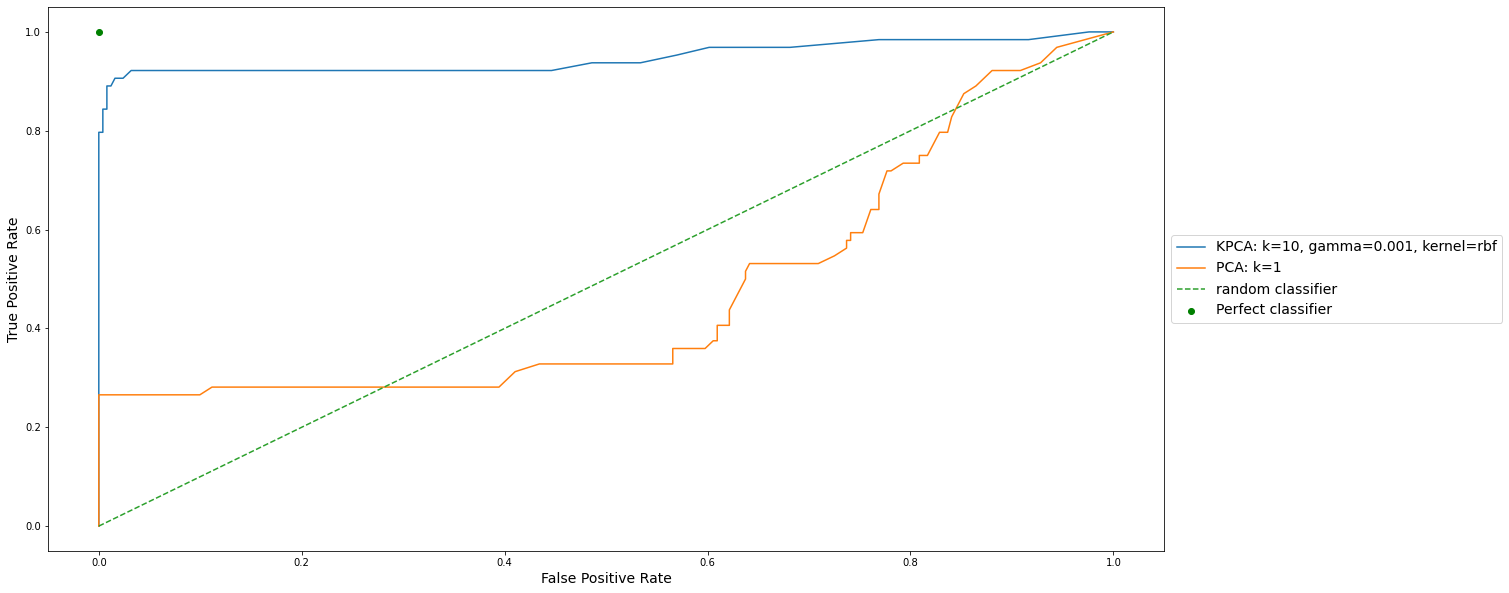

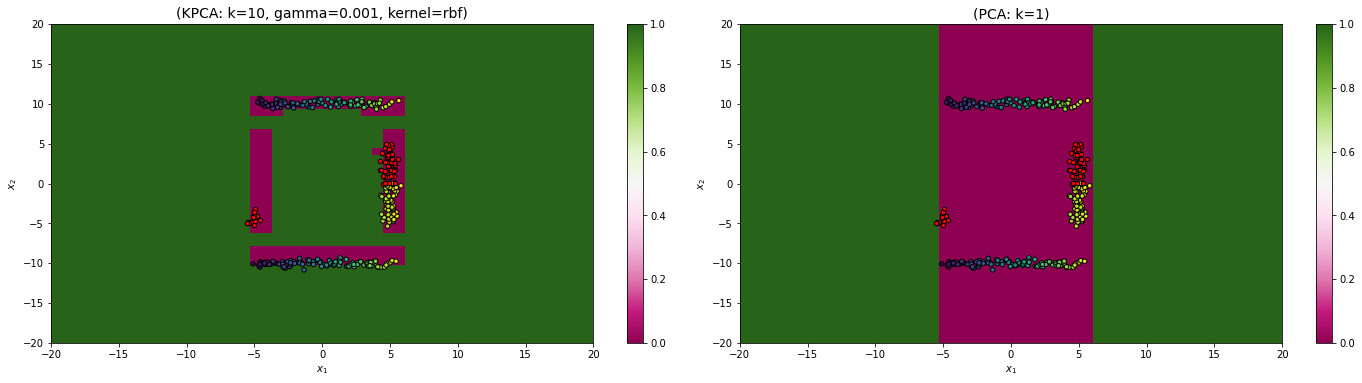

In [ ]:
# PCA outlier detector
clf_pca = OutlierDetectorPCA(pca_k_opt)
clf_pca.fit(X, y)
print(f'The score with PCA detector(k= {pca_k_opt}) on the training data is: {clf_pca.score(X_train, y_train)}')

# k-PCA outlier detector
param = {"kernel":kpca_param_opt[2], "gamma":kpca_param_opt[1]}
clf_kpca = OutlierDetectorKPCA(param, kpca_param_opt[0])
clf_kpca.fit(X, y)
print(f'The score with kPCA detector (k = {kpca_param_opt[0]}, gamma = {kpca_param_opt[1]}, kernel = {kpca_param_opt[2]}) on the training data is: {clf_kpca.score(X_train, y_train)}')


classifs = [clf_kpca, clf_pca] # list of the model I want to compare
plot_ROC(classifs, X_train, y_train)
plot_comparison_outlier_detector(classifs, X_train, y_train)

<font size=5 color=#009999> Q6. Analysis </font> <br>
</font>

In [ ]:
# TODO use this cell to put your experiments that support your answer of the Q6 on your written report

#- Applying the kPCA on the test set
y_pred_test = clf_kpca.predict(X_test)
test_score = clf_kpca.score(X_test, y_test)
print(f'The score on the test set is: {test_score}')
print(f'The score on the validation set is: {clf_kpca.score(X_val, y_val)}')
print(f'The score on the training set is: {clf_kpca.score(X_train, y_train)}')

The score on the test set is: 0.92
The score on the validation set is: 0.9777777777777777
The score on the training set is: 0.9523809523809523


<h1><center>LINMA2472 : Project 2, part 2, Random Fourier Features </center></h1>

Import the following packages and functions. Refer to their documentation on the internet for more information on installation and usage.


In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score

from keras.datasets import mnist #Contains the dataset
from matplotlib import pyplot as plt

import time #Used to find the execution time of a part of the code

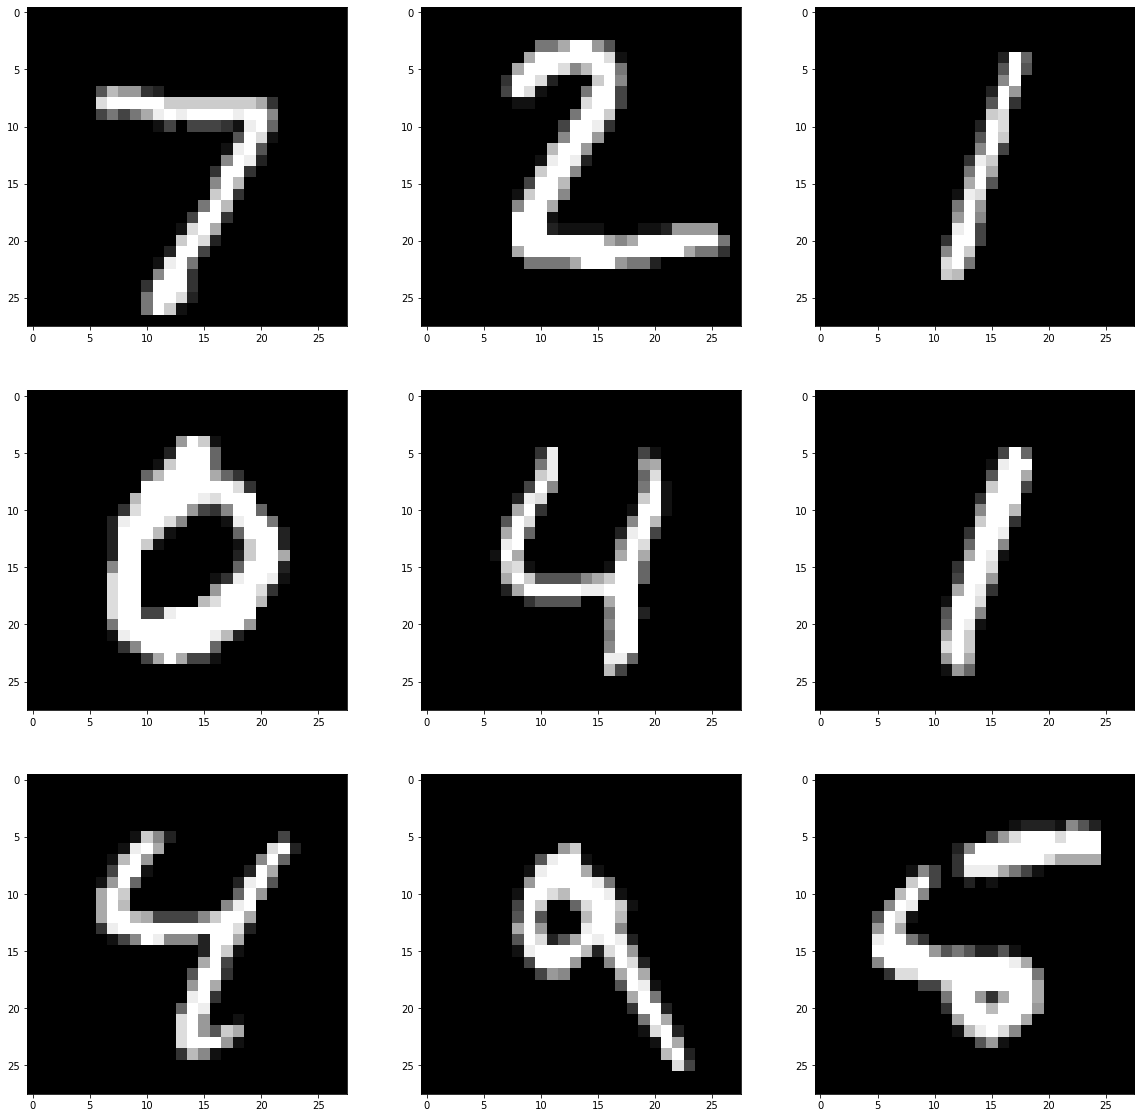

In [ ]:
# load dataset and rescale the data to [0,15]
''' load dataset: (we use the larger subset for testing and the smaller 
for training to demonstrate the efficiency of evaluation of new instances)'''
(testX,testy),(trainX,trainy) = mnist.load_data()
#Rescaling
trainX = np.floor(trainX/16)
testX = np.floor(testX/16)

#Plot some images, for fun
for i in range(9):
    pyplot.subplot(330+1+i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

#Put the data in vector form
trainX=trainX.reshape((10000,-1))
testX=testX.reshape((60000,-1))

### Use the *time* package functions to time the execution of parts of your code:

In [ ]:
#Example of timing a piece of code
tik=time.perf_counter() # Start
for i in range (100000000):
    i=i+1
tok=time.perf_counter() # Finish
print('Total time: %s' % (tok-tik))

Total time: 11.431256831998326


### Train a linear SVM on the training data and evaluate it on the testing data
Use the tik-tok method to see how long the method takes to evaluate the 60.000 testing instances

Use the accuracy metric to judge the quality of your classifier

In [ ]:
#Define the classifier
clfLin=svm.SVC(kernel="linear")
#Train the classifier
clfLin.fit(trainX,trainy)

#Evaluate its accuracy
tik=time.perf_counter() # Start
predicted=clfLin.predict(testX)
score=accuracy_score(testy,predicted)
print('Accuracy:%s' % (score))

tok=time.perf_counter() # Finish
print('Total time: %s' % (tok-tik))
LinearSVM= tok-tik
LinearSVMa= score

Accuracy:0.90665
Total time: 61.183598461000656


### Train a Kernel SVM with the Gaussian Kernel on the training data and evaluate it on the testing data
Use the tik-tok method to see how long the method takes to evaluate the $60000$ testing instances

Use the accuracy metric to judge the quality of your classifier

You may stick to the default parameters of sci-kit learn

In [ ]:
#Define the classifier
clfKernel=svm.SVC(kernel='rbf')
#Train it
clfKernel.fit(trainX, trainy)
#Use it
tik=time.perf_counter() # Start
predicted=clfKernel.predict(testX)
score=accuracy_score(testy,predicted)
print('Accuracy: %s' % (score))

tok=time.perf_counter() # Finish
print('Total time: %s' % (tok-tik))
KernelSVM=tok-tik
KernelSVMa=score

Accuracy: 0.9560833333333333
Total time: 178.18253661799827


### Use the following functions to implement Random Fourier Features

Use the first function to generate your $\boldsymbol\omega_i$ and $b_i$

Use the second function to create the mapping $\boldsymbol z(\boldsymbol x)$ as described in the slides.

In [ ]:
def generate_freq(D,d,sigma):
  W=[]
  # W = np.random.normal(loc=0,scale=sigma,size=(d,D))
  for i in range(D):
    W.append(np.random.normal(loc=0,scale=sigma,size=d))
  b = np.random.uniform(0,2*np.pi,size=D)
  W=np.array(W) #Besoin d'une array
  return W,b

def rff_gaussian2(X,W,b,D):
  #Z  = np.sqrt(2/D) * (np.cos( W.T @ X + b)) -> Formule du cours slide 35
  a=(W@X.transpose()).transpose()+b
  a.transpose()
  Z=np.sqrt(2/D)*np.cos(a)
  return Z

### Transform your trainX and testX

Use the function you defined to transform your data

Make sure you only generate $\boldsymbol W$ and $\boldsymbol b$ once

Use $\sigma=1/100$ and $D=300$

You may also use the tik-tok method to time the procedure of creating Random features

In [ ]:
tik=time.perf_counter() # Start
D= 300
sigma = 1/100
W,b=generate_freq(D,len(trainX[0]),sigma)

trainX_rff=rff_gaussian2(trainX,W,b,D)
testX_rff=rff_gaussian2(testX,W,b,D)

tok=time.perf_counter() # Finish
print('Total time: %s' % (tok-tik))

Total time: 1.7811929439994856


### Use another linear SVM to classify the transformed data

In [ ]:

#Define the classifier
clfRff = svm.SVC(kernel="linear",C=np.inf)
#Train it
clfRff.fit(trainX_rff, trainy)
#Use it
tik=time.perf_counter() # Start
predicted = clfRff.predict(testX_rff)
score = accuracy_score(testy,predicted)
print('Accuracy: %s' % (score))

tok=time.perf_counter() # Finish
print('Total time: %s' % (tok-tik))
SVMandRFF = tok-tik
SVMandRFFa = score

Accuracy: 0.8917666666666667
Total time: 22.830687124001997


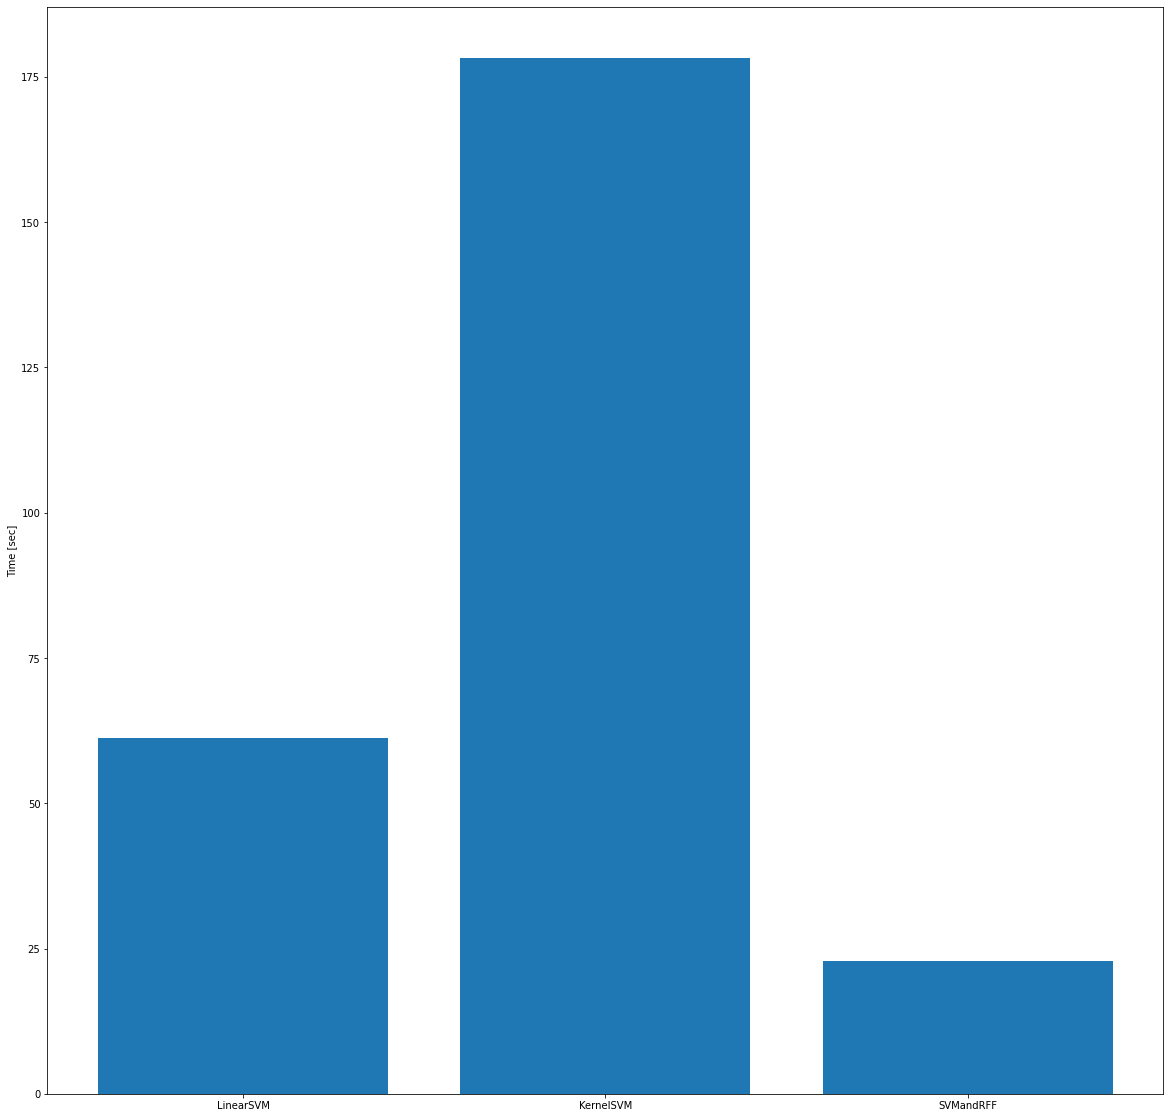

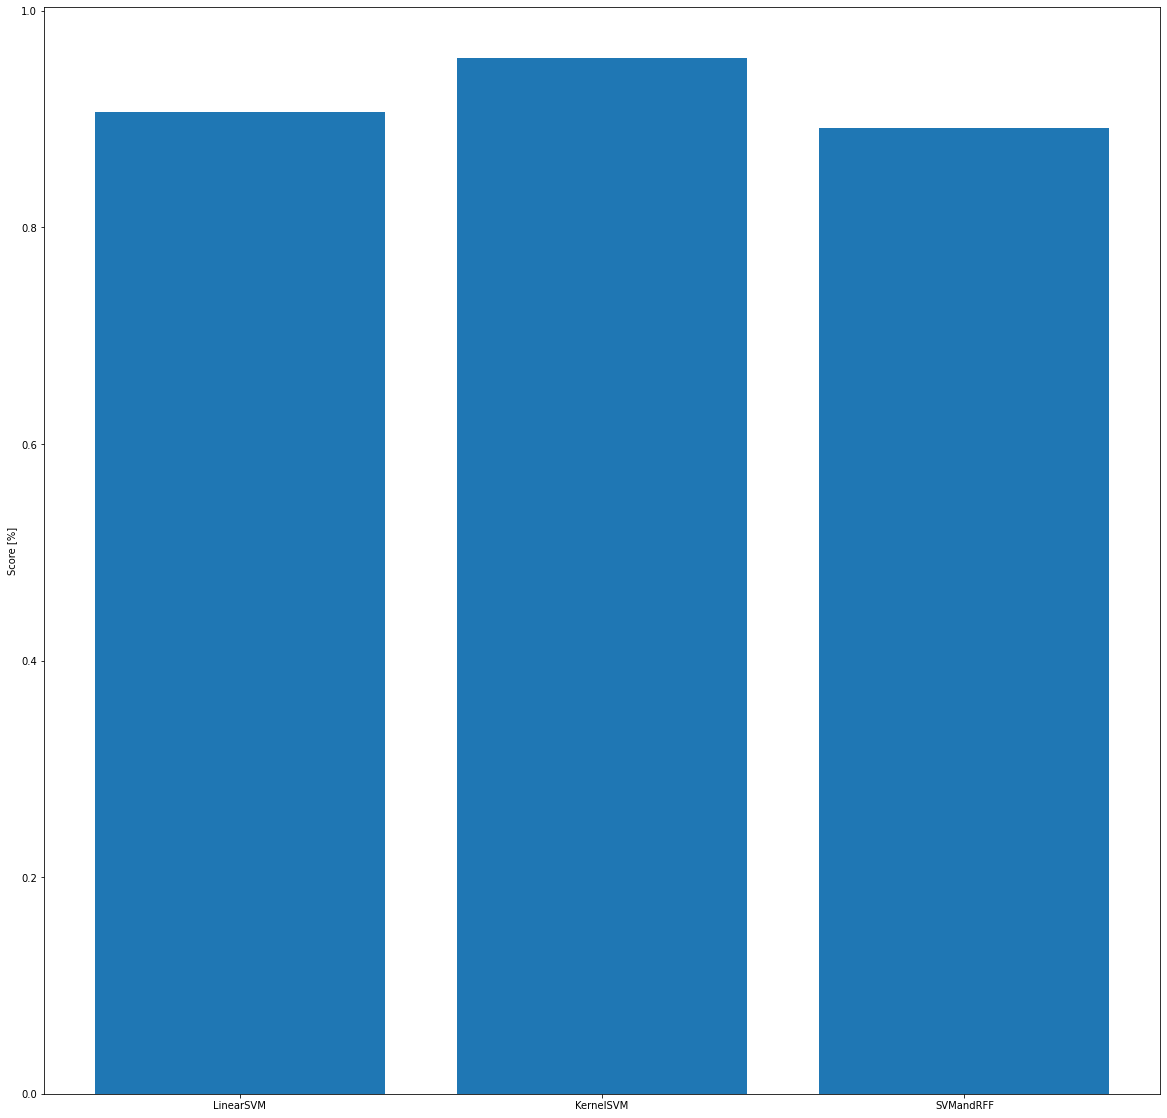

In [ ]:
a= [LinearSVM,KernelSVM,SVMandRFF]
plt.bar(x=['LinearSVM','KernelSVM','SVMandRFF'], height=[a[0],a[1],a[2]])
plt.ylabel("Time [sec]",fontsize=10)
plt.show()

a= [LinearSVMa,KernelSVMa,SVMandRFFa]
plt.bar(x=['LinearSVM','KernelSVM','SVMandRFF'], height=[a[0],a[1],a[2]])
plt.ylabel("Score [%]",fontsize=10)
plt.show()

### Additional workspace 

Testing the accuracy for different values of $D$.

In [ ]:
#Define a vector to store the accuracy values you will get
accuracy=[]
creatime = []
traintime=[]
clastime=[]
timetot=[]
#Define for which values of D you want to test the RFF
Dtest = [200,250,300,350,400]
for i in range(5):
    #Create RFF
    tik1=time.perf_counter() # Start
    D=Dtest[i]
    W,b = generate_freq(D, len(trainX[0]),1/100)
    trainX_rff=rff_gaussian2(trainX,W,b,D)
    testX_rff=rff_gaussian2(testX,W,b,D)
    tok1=time.perf_counter() # Finish
    time1=(tok1-tik1)
    #Train and evaluate a linear classifier
    tik2=time.perf_counter() # Start
    clfRff = svm.SVC(kernel="linear",C=np.inf) #Define the classifier
    clfRff.fit(trainX_rff, trainy)             #Train it
    tok2=time.perf_counter() # Finish
    time2=(tok2-tik2)
    tik3=time.perf_counter() # Start
    predicted = clfRff.predict(testX_rff)      #Use it
    acc=accuracy_score(testy,predicted)
    tok3=time.perf_counter() # Finish
    time3=(tok3-tik3)
    print(D, "accuracy=",acc, 
          "Time to create the RFF=",time1,
          "Time to train the SVM with RFF=",time2,
          "Time to classify the testing instances=",time3)
    accuracy.append(acc)
    creatime.append(time1)
    traintime.append(time2)
    clastime.append(time3)
    tot = time1+time2+time3
    timetot.append(tot)

200 accuracy= 0.8634 Time to create the RFF= 1.197274546000699 Time to train the SVM with RFF= 4.692568810998637 Time to classify the testing instances= 15.037050667997391
250 accuracy= 0.8825 Time to create the RFF= 1.5033260339987464 Time to train the SVM with RFF= 3.1475038379976468 Time to classify the testing instances= 18.39327040200078
300 accuracy= 0.8884 Time to create the RFF= 1.7526386520003143 Time to train the SVM with RFF= 3.527227114998823 Time to classify the testing instances= 22.45312292000017
350 accuracy= 0.9034166666666666 Time to create the RFF= 1.9773316760001762 Time to train the SVM with RFF= 3.40461939600209 Time to classify the testing instances= 26.801047993001703
400 accuracy= 0.9129666666666667 Time to create the RFF= 2.18408526499843 Time to train the SVM with RFF= 3.759359523002786 Time to classify the testing instances= 25.792035792997922


### Don't forget to add plots and other nice things

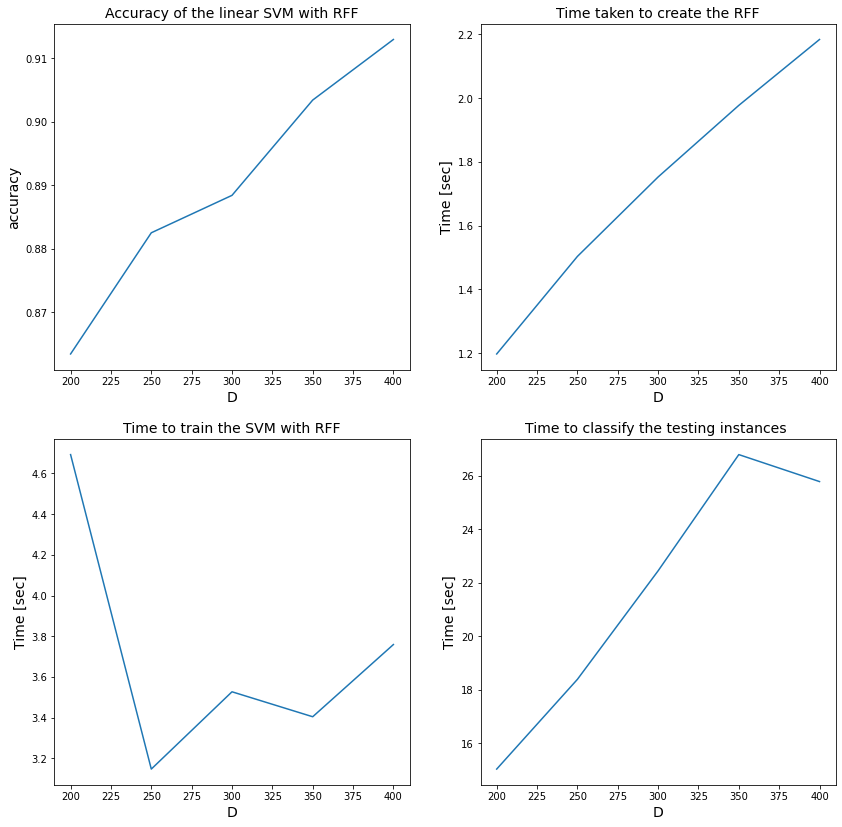

In [ ]:
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.plot(Dtest,accuracy)
plt.xlabel("D",fontsize=14)
plt.ylabel("accuracy",fontsize=14)
plt.title("Accuracy of the linear SVM with RFF",fontsize=14)
#plt.show()
plt.subplot(2,2,2)
plt.plot(Dtest,creatime)
plt.xlabel("D",fontsize=14)
plt.ylabel("Time [sec]",fontsize=14)
plt.title("Time taken to create the RFF",fontsize=14)
#plt.show()
plt.subplot(2,2,3)
plt.plot(Dtest,traintime)
plt.xlabel("D",fontsize=14)
plt.ylabel("Time [sec]",fontsize=14)
plt.title("Time to train the SVM with RFF",fontsize=14)
# plt.show()
plt.subplot(2,2,4)
plt.plot(Dtest,clastime)
plt.xlabel("D",fontsize=14)
plt.ylabel("Time [sec]",fontsize=14)
plt.title("Time to classify the testing instances ",fontsize=14)
plt.show()

# plt.subplot(2,3,5)
# plt.plot(Dtest,timetot)
# plt.xlabel("D")
# plt.ylabel("Total time [sec]")
# plt.tight_layout()
# #plt.show()